## Scenario 1


1. import suw4v for model
2. import reinfection_mtraix_suw4v for heatmaps
3. import biodata for data


4.  R0s and bounds for reinfection rates to test GAS conditions
5. Escenarios I: cpce, II cp ce ho9m, III cpce he 9 to 14 m





3.7.6
4.5.2
-------------------------------
Bell_antigenic_reM 
 [[array([[0. , 0. , 0. , 0. ],
       [0.6, 0. , 0. , 0. ],
       [0.6, 0. , 0. , 0. ],
       [0.6, 0. , 0. , 0. ]])
  array([[1.9, 2.3, 2.3, 2.3, 4.3, 2.8],
       [2.9, 3.3, 3.4, 3.4, 5.3, 3.3],
       [2.5, 2.8, 3. , 3. , 4.9, 3.4],
       [1.4, 1.7, 1.8, 1.8, 3.8, 2.2]])
  array([[1.5, 1.8, 2.2, 1.8],
       [2.4, 2.7, 3.2, 2.7],
       [2. , 2.3, 2.9, 2.3],
       [1.1, 1.3, 1.9, 1.4]])
  array([[1.6, 1.6, 1.6],
       [3. , 2.5, 2.9],
       [2.1, 2.1, 2. ],
       [1.2, 1.2, 1.1]])]
 [array([[2.7, 2.6, 0.6, 2.8],
       [3.3, 3.1, 1.1, 3.3],
       [2.6, 2.5, 0.8, 2.7],
       [2.8, 2.7, 1. , 2.9],
       [2.6, 2.5, 0.7, 2.7],
       [2.5, 2.5, 0.6, 2.6]])
  array([[0. , 0.5, 0.1, 0.5, 0.5, 0.2],
       [0.5, 0. , 0.5, 0.4, 0.4, 0.5],
       [0.7, 1.1, 0. , 0.8, 0.7, 0.1],
       [0.5, 0.4, 0.2, 0. , 0.1, 0.1],
       [0.7, 0.7, 0.4, 0.3, 0. , 0.3],
       [0.9, 1.2, 0.6, 0.7, 0.8, 0. ]])
  array([[1. , 1.9, 1.8,

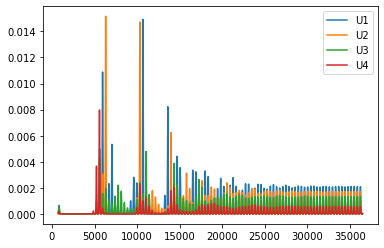

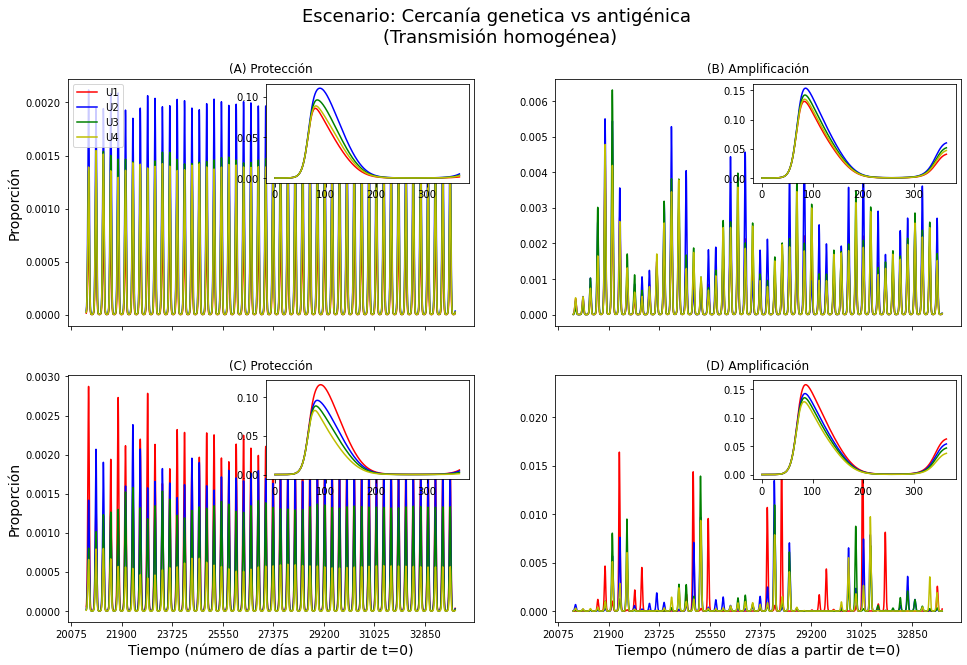

In [1]:
%run all_ivp_mass_suw4v_solutions_lowR0s_2021.ipynb

In [2]:
#function for saving figures with names
figs_path = 'figsThesisNan2020/suw4v/ivp/lowR0s/'
if not os.path.isdir(figs_path): os.makedirs(figs_path)

In [3]:
#function for saving figures with names
figs_path_ts = 'figsThesisNan2020/suw4v/ivp/lowR0s/time_series/'
if not os.path.isdir(figs_path_ts): os.makedirs(figs_path_ts)

In [4]:
#function for saving figures with names
figs_path_cum = 'figsThesisNan2020/suw4v/ivp/lowR0s/cumulative_cases/'
if not os.path.isdir(figs_path_cum): os.makedirs(figs_path_cum)

In [5]:
#function for saving figures with names
figs_path_fourier = 'figsThesisNan2020/suw4v/ivp/lowR0s/fourier/'
if not os.path.isdir(figs_path_fourier): os.makedirs(figs_path_fourier)

In [6]:
import seaborn as sns
sns.set()

# Plotting functions


### Plotting time series, chose reinfection (genetic vs antigenic) and reaction type (CP vs CE)

In [7]:
def plotting_dfs_time_series(dfs_vec,t1,t_start,t_end,cols,cols_name,scenario):
    fig, axes=plt.subplots(2,2,figsize=(16,10),sharex=True)

    colors=['r','b','g','y']

    wid='50%'
    hei='40%'

    df1,df2,df3,df4=dfs_vec

    
    #plt.suptitle('Scenario: Genetic vs Antigenic reinfection based \n'+'(Transmisión homogénea)',fontsize=18)

    ax11=axes[0,0]


    df1[cols][t_start:t_end].plot(ax=ax11,color=colors)
    ax11.legend(loc='upper left')

    ax11_2=inset_axes(ax11,width=wid,height=hei)
    df1[cols][:t1].plot(ax=ax11_2,color=colors,legend=False)


    ax12=axes[0,1]


    df2[cols][t_start:t_end].plot(ax=ax12,color=colors,legend=False)

    ax12_2=inset_axes(ax12,width=wid,height=hei)
    df2[cols][:t1].plot(ax=ax12_2,color=colors,legend=False)


    #-------------------------------------------------------------#
    ax21=axes[1,0]
    df3[cols][t_start:t_end].plot(ax=ax21,color=colors,legend=False)

    ax21_2=inset_axes(ax21,width=wid,height=hei)
    df3[cols][:t1].plot(ax=ax21_2,color=colors,legend=False)

    ax22=axes[1,1]
    df4[cols][t_start:t_end].plot(ax=ax22,color=colors,legend=False)

    ax22_2=inset_axes(ax22,width=wid,height=hei)
    df4[cols][:t1].plot(ax=ax22_2,color=colors,legend=False)


    ax11.set_title('(A) Cross-Protection',fontsize=20)
    ax12.set_title('(B) Cross-Enhancement',fontsize=20)
    ax21.set_title('(C) Cross-Protection',fontsize=20)
    ax22.set_title('(D) Cross-Enhancement',fontsize=20)




    for ax in [ax11,ax21]:
        ax.set_ylabel('Proportion',fontsize=20)


    for ax in [ax21,ax22]:
        ax.set_xlabel('Time (years)',fontsize=20)



    ax0=axes[0,0]
    #ax0.set_xticks(np.arange(t_start, t_end+1, 365*5, dtype=np.int))
    #ax0.set_xticklabels(np.arange(t_start/365, t_end/365+5, 5, dtype=np.int))

    ax0.set_xticks(np.arange(t_start, t_end+1, 365*5, dtype=np.int))
    ax0.set_xticklabels(np.arange(t_start/365, t_end/365+5, 5, dtype=np.int))


    for ax in [ax11_2,ax12_2,ax21_2,ax22_2]:
        ax.set_xticks(np.arange(0, t1+1, 365, dtype=np.int))
        ax.set_xticklabels(np.arange(0, t1/365+1, 1, dtype=np.int))

    # FRO SAVING FIGURE
    total_years=int((t_end-t_start)/365)
    plt.savefig(figs_path_ts+scenario+'mass_suw4v_ts_'+cols_name+str(total_years)+'years_N1M1_ivp'+'.pdf',format='pdf')

    print('Initial conditions')
    print(init)




In [8]:
# Relative frequencies
def plotting_cumulative_cases(label,t_start,t_end,cols,cols_name,scenario):
    total_years=((t_end-t_start)/100)
    
    fig, axes=plt.subplots(2,2,figsize=(14,8),sharex=True)

    colors=['r','b','g','y']


    #step=7*10  #take only week data
    #step=1
    #step=1   #not take only the output of daily data, otherwise would be summing up more cases!!!!

    #step_cut=365*1     #year data
    #step_cut=365*10     # not year data

    wid='50%'
    hei='40%'

    kind_plot='area'

    stacked_type=True

    #dataH_homo_cp,dataH_homo_antigencp=[dfsH_gen_cp[key].groupby(pd.cut(dfsH_gen_cp[key].index,np.arange(0,dfsH_gen_cp[key].index[-1],7))) for key in dfsH_gen_cp.keys()]


    # for having areas using proportion of infections use this:
    #dataH_homo_cp,dataH_homo_antigencp=[dfsH_gen_cp[key].groupby(pd.cut(dfsH_gen_cp[key].index,np.arange(0,dfsH_gen_cp[key].index[-1],step_cut))).sum() for key in dfsH_gen_cp.keys()]
    #dataH_homo_ce,dataH_homo_antigence=[dfsH_gen_ce[key].groupby(pd.cut(dfsH_gen_ce[key].index,np.arange(0,dfsH_gen_ce[key].index[-1],step_cut))).sum() for key in dfsH_gen_ce.keys()]



    #plt.suptitle('Cumulative cases \n Scenario: Genetic vs Antigenic reinfection based con homogeneous transmission',fontsize=20)

    ax11=axes[0,0]

    year_dfsH_gen_cp[label][cols][t_start:t_end].plot(ax=ax11,color=colors,kind=kind_plot,stacked=stacked_type)
    ax11.legend(loc='upper left')


    ax12=axes[0,1]

    year_dfsH_gen_ce[label][cols][t_start:t_end].plot(ax=ax12,color=colors,kind=kind_plot,stacked=stacked_type,legend=False)


    #-------------------------------------------------------------#
    ax21=axes[1,0]
    year_dfsH_antigen_cp[label][cols][t_start:t_end].plot(ax=ax21,color=colors,kind=kind_plot,stacked=stacked_type,legend=False)

    ax22=axes[1,1]
    year_dfsH_antigen_ce[label][cols][t_start:t_end].plot(ax=ax22,color=colors,kind=kind_plot,stacked=stacked_type,legend=False)


    #plt.legend(loc='best')

    #if t_end <= 52:
    #    step = 1
    #    rotation = "horizontal"
    #elif t_end <= step_cut:
    #    step = 52
    #    rotation = "vertical"
    #else:
    #    step = 10
    #    rotation = "vertical"


    for ax in [ax11,ax21]:
        ax.set_ylabel('Proportion ',fontsize=16)

    for ax in [ax21,ax22]:
        ax.set_xlabel('Time (years)',fontsize=16)


    ax11.set_title('(A) Cross-Protection',fontsize=20)
    ax12.set_title('(B) Cross-Enhancement',fontsize=20)
    ax21.set_title('(C) Cross-Protection',fontsize=20)
    ax22.set_title('(D) Cross-Enhancement',fontsize=20)


    # For saving figure
    #plt.savefig(figs_path_cum+'scenImass_suw4v_cumreqsUs_gen_vs_antigen_homo_50years_N1M1_ivp'+'.pdf',format='pdf')
    plt.savefig(figs_path_cum+scenario+'mass_suw4v_cum_'+cols_name+'_'+str(total_years)+'years_N1M1_ivp'+'.pdf',format='pdf')



In [9]:
# Relative frequencies
def plotting_dfs_cumulative_cases(dfs_vec,t_start,t_end,cols,cols_name,scenario):
    total_years=((t_end-t_start))
    
    df1,df2,df3,df4=dfs_vec
    
    fig, axes=plt.subplots(2,2,figsize=(14,8),sharex=True)

    colors=['r','b','g','y']


    #step=7*10  #take only week data
    #step=1
    #step=1   #not take only the output of daily data, otherwise would be summing up more cases!!!!

    #step_cut=365*1     #year data
    #step_cut=365*10     # not year data

    wid='50%'
    hei='40%'

    kind_plot='area'

    stacked_type=True

    #dataH_homo_cp,dataH_homo_antigencp=[dfsH_gen_cp[key].groupby(pd.cut(dfsH_gen_cp[key].index,np.arange(0,dfsH_gen_cp[key].index[-1],7))) for key in dfsH_gen_cp.keys()]


    # for having areas using proportion of infections use this:
    #dataH_homo_cp,dataH_homo_antigencp=[dfsH_gen_cp[key].groupby(pd.cut(dfsH_gen_cp[key].index,np.arange(0,dfsH_gen_cp[key].index[-1],step_cut))).sum() for key in dfsH_gen_cp.keys()]
    #dataH_homo_ce,dataH_homo_antigence=[dfsH_gen_ce[key].groupby(pd.cut(dfsH_gen_ce[key].index,np.arange(0,dfsH_gen_ce[key].index[-1],step_cut))).sum() for key in dfsH_gen_ce.keys()]



    #plt.suptitle('Cumulative cases \n Scenario: Genetic vs Antigenic reinfection based con homogeneous transmission',fontsize=20)

    ax11=axes[0,0]

    df1[cols][t_start:t_end].plot(ax=ax11,color=colors,kind=kind_plot,stacked=stacked_type)
    ax11.legend(loc='upper left')


    ax12=axes[0,1]

    df2[cols][t_start:t_end].plot(ax=ax12,color=colors,kind=kind_plot,stacked=stacked_type,legend=False)


    #-------------------------------------------------------------#
    ax21=axes[1,0]
    df3[cols][t_start:t_end].plot(ax=ax21,color=colors,kind=kind_plot,stacked=stacked_type,legend=False)

    ax22=axes[1,1]
    df4[cols][t_start:t_end].plot(ax=ax22,color=colors,kind=kind_plot,stacked=stacked_type,legend=False)


    #plt.legend(loc='best')

    #if t_end <= 52:
    #    step = 1
    #    rotation = "horizontal"
    #elif t_end <= step_cut:
    #    step = 52
    #    rotation = "vertical"
    #else:
    #    step = 10
    #    rotation = "vertical"


    for ax in [ax11,ax21]:
        ax.set_ylabel('Proportion ',fontsize=16)

    for ax in [ax21,ax22]:
        ax.set_xlabel('Time (years)',fontsize=16)


    ax11.set_title('(A) Cross-Protection',fontsize=20)
    ax12.set_title('(B) Cross-Enhancement',fontsize=20)
    ax21.set_title('(C) Cross-Protection',fontsize=20)
    ax22.set_title('(D) Cross-Enhancement',fontsize=20)


    # For saving figure
    #plt.savefig(figs_path_cum+'scenImass_suw4v_cumreqsUs_gen_vs_antigen_homo_50years_N1M1_ivp'+'.pdf',format='pdf')
    plt.savefig(figs_path_cum+scenario+'mass_suw4v_cum_'+cols_name+'_'+str(total_years)+'years_N1M1_ivp'+'.pdf',format='pdf')



# (I) gen vs antigen homo pars

Initial conditions
[0.99996, 1e-05, 1e-05, 1e-05, 1e-05, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


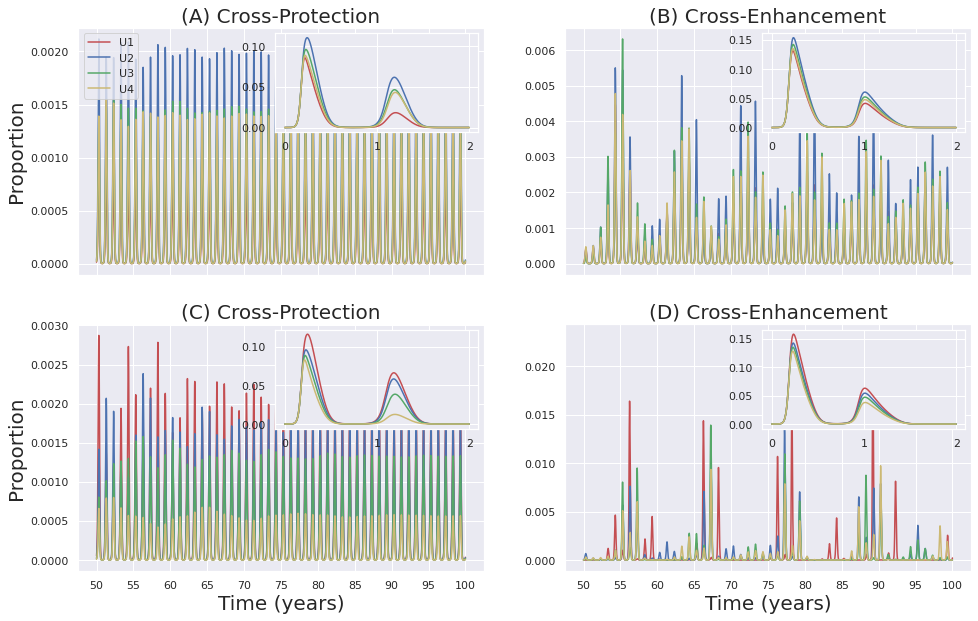

In [10]:
#plotting_time_series('homo',365*2,365*50,365*100,Us,'Us','scenI')
dfs_gen_antigen_homo=[dfsH_gen_cp['homo'],dfsH_gen_ce['homo'],dfsH_antigen_cp['homo'],dfsH_antigen_ce['homo']]

plotting_dfs_time_series(dfs_gen_antigen_homo,365*2,365*50,365*100,Us,'Us','scenI')

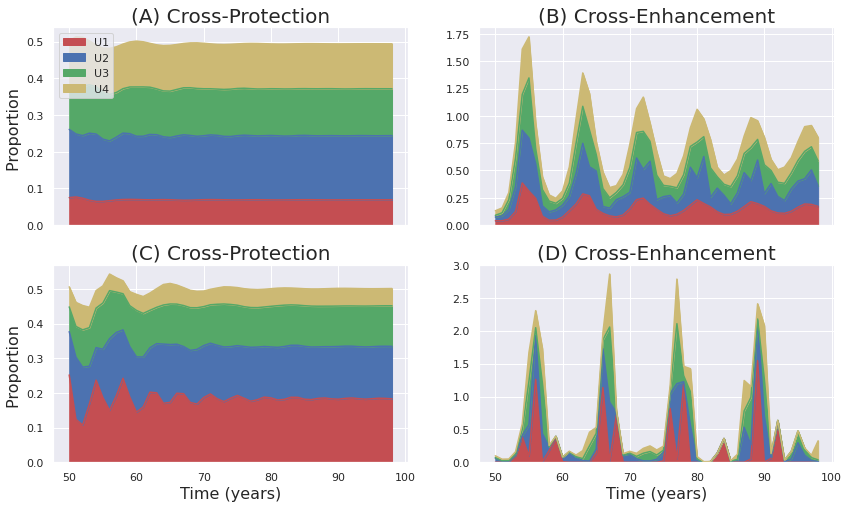

In [11]:
#plotting_cumulative_cases('homo',50,100,Us,'Us','scenI')
year_dfs_gen_antigen_homo=[year_dfsH_gen_cp['homo'],year_dfsH_gen_ce['homo'],year_dfsH_antigen_cp['homo'],year_dfsH_antigen_ce['homo']]

plotting_dfs_cumulative_cases(year_dfs_gen_antigen_homo,50,100,Us,'Us','scenI')

# (II) gen vs antigen hetero pars

Initial conditions
[0.99996, 1e-05, 1e-05, 1e-05, 1e-05, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


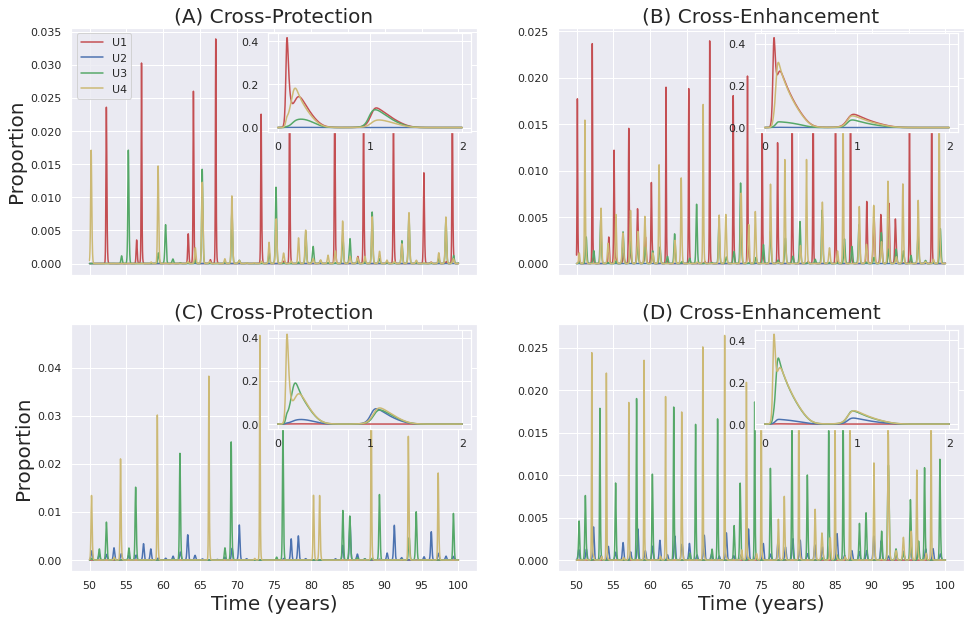

In [12]:
#plotting_time_series('hetero',365*2,365*50,365*100,Us,'Us','scenII')
dfs_gen_antigen_hetero=[dfsH_gen_cp['hetero'],dfsH_gen_ce['hetero'],dfsH_antigen_cp['hetero'],dfsH_antigen_ce['hetero']]

plotting_dfs_time_series(dfs_gen_antigen_hetero,365*2,365*50,365*100,Us,'Us','scenII')

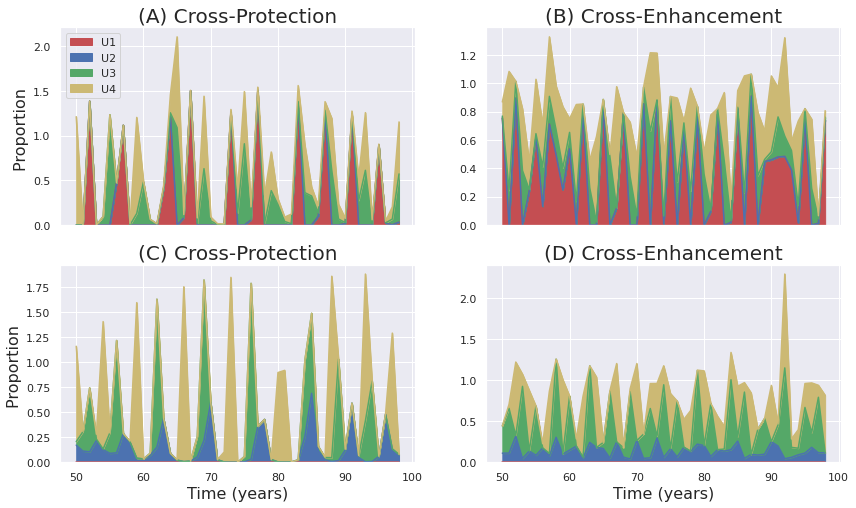

In [13]:
#plotting_cumulative_cases('hetero',50,100,Us,'Us','scenII')

year_dfs_gen_antigen_hetero=[year_dfsH_gen_cp['hetero'],year_dfsH_gen_ce['hetero'],year_dfsH_antigen_cp['hetero'],year_dfsH_antigen_ce['hetero']]

plotting_dfs_cumulative_cases(year_dfs_gen_antigen_hetero,50,100,Us,'Us','scenII')

# (III) Genetic distance-based reinfection homo vs hetero


Initial conditions
[0.99996, 1e-05, 1e-05, 1e-05, 1e-05, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


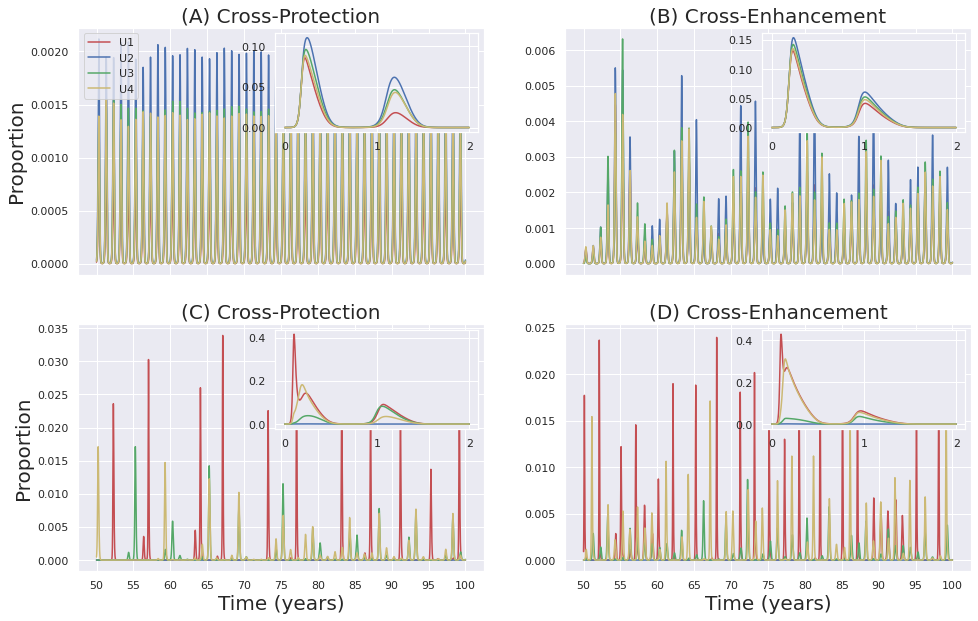

In [14]:

dfs_gen_homo_hetero=[dfsH_gen_cp['homo'],dfsH_gen_ce['homo'],dfsH_gen_cp['hetero'],dfsH_gen_ce['hetero']]

plotting_dfs_time_series(dfs_gen_homo_hetero,365*2,365*50,365*100,Us,'Us','scenIII')

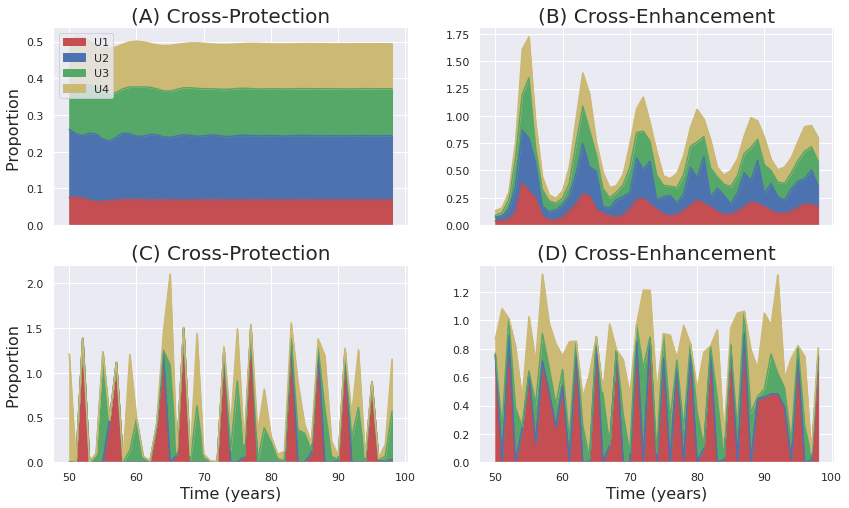

In [15]:
year_dfs_gen_homo_hetero=[year_dfsH_gen_cp['homo'],year_dfsH_gen_ce['homo'],year_dfsH_gen_cp['hetero'],year_dfsH_gen_ce['hetero']]

plotting_dfs_cumulative_cases(year_dfs_gen_homo_hetero,50,100,Us,'Us','scenIII')

# (IV) Antigenic distance-based reinfection homo vs hetero


Initial conditions
[0.99996, 1e-05, 1e-05, 1e-05, 1e-05, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


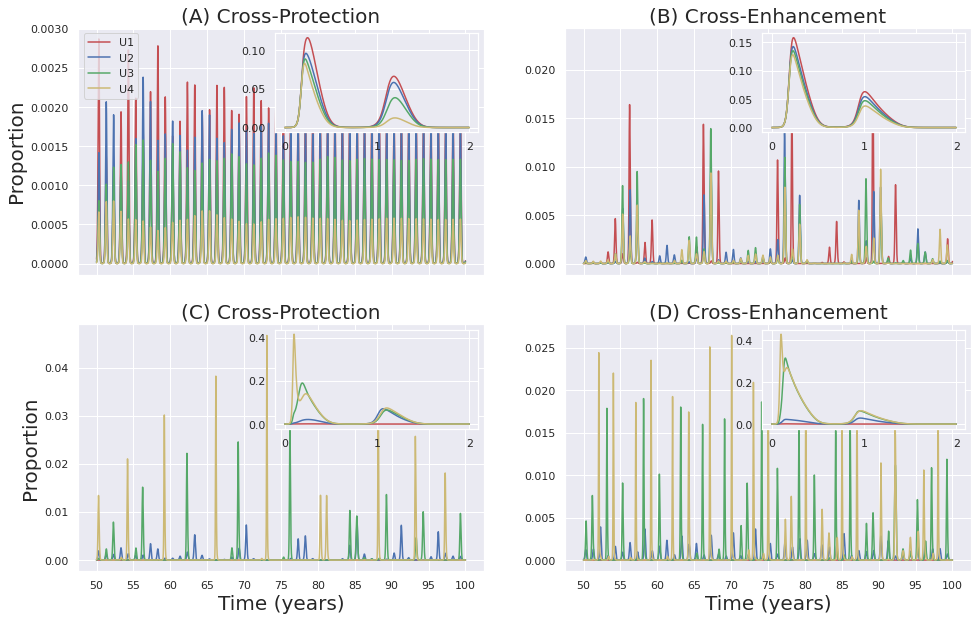

In [16]:

dfs_antigen_homo_hetero=[dfsH_antigen_cp['homo'],dfsH_antigen_ce['homo'],dfsH_antigen_cp['hetero'],dfsH_antigen_ce['hetero']]

plotting_dfs_time_series(dfs_antigen_homo_hetero,365*2,365*50,365*100,Us,'Us','scenIV')

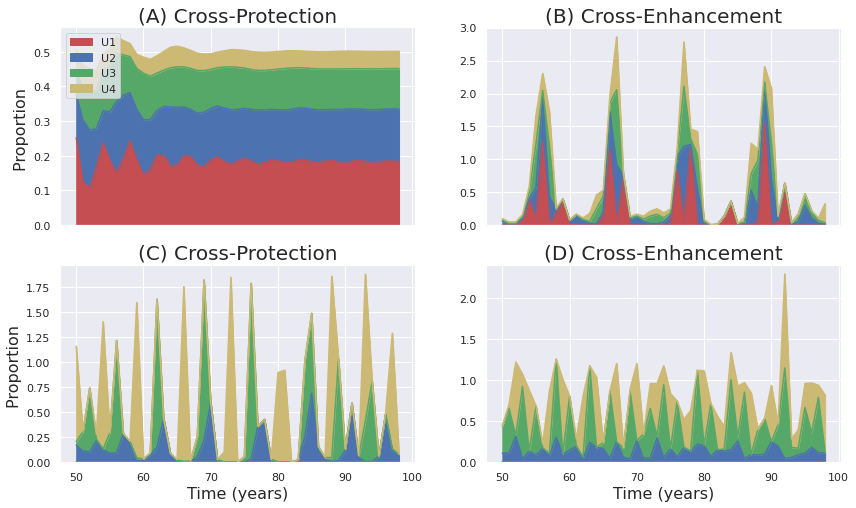

In [17]:
year_dfs_antigen_homo_hetero=[year_dfsH_antigen_cp['homo'],year_dfsH_antigen_ce['homo'],year_dfsH_antigen_cp['hetero'],year_dfsH_antigen_ce['hetero']]

plotting_dfs_cumulative_cases(year_dfs_antigen_homo_hetero,50,100,Us,'Us','scenIV')

# Fourier analysis

In [18]:
'''Genetic CP'''

signalsU_gen_cp=[week_dfsH_gen_cp['homo'][U][52*50:] for U in Us]
signalsU_gen_cp_he=[week_dfsH_gen_cp['hetero'][U][52*50:] for U in Us]


time=pd.Series(range(len(signalsU_gen_cp[0])))


fftUs_gen_cp=[np.fft.fft(signal) for signal in signalsU_gen_cp]
powerUs_gen_cp=[np.abs(fft) for fft in fftUs_gen_cp]
freqUs_gen_cp=[np.fft.fftfreq(len(signal)) for signal in signalsU_gen_cp]

fftUs_gen_cp_he=[np.fft.fft(signal) for signal in signalsU_gen_cp_he]
powerUs_gen_cp_he=[np.abs(fft) for fft in fftUs_gen_cp_he]
freqUs_gen_cp_he=[np.fft.fftfreq(len(signal)) for signal in signalsU_gen_cp_he]



In [19]:
'''Genetic CE'''
#365*10/12   for monthly data
signalsU_gen_ce=[week_dfsH_gen_ce['homo'][U][52*50:] for U in Us]

time=pd.Series(range(len(signalsU_gen_ce[0])))

fftUs_gen_ce=[np.fft.fft(signal) for signal in signalsU_gen_ce]
powerUs_gen_ce=[np.abs(fft) for fft in fftUs_gen_ce]
freqUs_gen_ce=[np.fft.fftfreq(len(signal)) for signal in signalsU_gen_ce]



signalsU_gen_ce_he=[week_dfsH_gen_ce['hetero'][U][52*50:] for U in Us]

fftUs_gen_ce_he=[np.fft.fft(signal) for signal in signalsU_gen_ce_he]
powerUs_gen_ce_he=[np.abs(fft) for fft in fftUs_gen_ce_he]
freqUs_gen_ce_he=[np.fft.fftfreq(len(signal)) for signal in signalsU_gen_ce_he]

In [20]:
'''Antigenic CP'''
#365*10/12   for monthly data
signalsU_antigen_cp=[week_dfsH_antigen_cp['homo'][U][52*50:] for U in Us]
time=pd.Series(range(len(signalsU_antigen_cp[0])))

fftUs_antigen_cp=[np.fft.fft(signal) for signal in signalsU_antigen_cp]
powerUs_antigen_cp=[np.abs(fft) for fft in fftUs_antigen_cp]
freqUs_antigen_cp=[np.fft.fftfreq(len(signal)) for signal in signalsU_antigen_cp]


signalsU_antigen_cp_he=[week_dfsH_antigen_cp['hetero'][U][52*50:] for U in Us]
time=pd.Series(range(len(signalsU_antigen_cp_he[0])))

fftUs_antigen_cp_he=[np.fft.fft(signal) for signal in signalsU_antigen_cp_he]
powerUs_antigen_cp_he=[np.abs(fft) for fft in fftUs_antigen_cp_he]
freqUs_antigen_cp_he=[np.fft.fftfreq(len(signal)) for signal in signalsU_antigen_cp_he]

In [21]:
'''Antigenic CE'''
#365*10/12   for monthly data
signalsU_antigen_ce=[week_dfsH_antigen_ce['homo'][U][52*50:] for U in Us]
time=pd.Series(range(len(signalsU_antigen_ce[0])))

fftUs_antigen_ce=[np.fft.fft(signal) for signal in signalsU_antigen_ce]
powerUs_antigen_ce=[np.abs(fft) for fft in fftUs_antigen_ce]
freqUs_antigen_ce=[np.fft.fftfreq(len(signal)) for signal in signalsU_antigen_ce]


'''Antigenic ce_he'''
#365*10/12   for monthly data
signalsU_antigen_ce_he=[week_dfsH_antigen_ce['hetero'][U][52*50:] for U in Us]
time=pd.Series(range(len(signalsU_antigen_ce_he[0])))

fftUs_antigen_ce_he=[np.fft.fft(signal) for signal in signalsU_antigen_ce_he]
powerUs_antigen_ce_he=[np.abs(fft) for fft in fftUs_antigen_ce_he]
freqUs_antigen_ce_he=[np.fft.fftfreq(len(signal)) for signal in signalsU_antigen_ce_he]


## Homogeneous parameters

In [22]:
#masks = [freq >= 0 for freq in freqUs]
#mask = (freq > min_freq) & (freq <= 0.4)
#mask=[freq<=max_freq for freq in masks1]

min_freq=1/(52*20)
max_freq=1/(4*3)  #which means max period 3 months

freqUs_mask_gen_cp = [freq[(freq > min_freq) & (freq <= max_freq)] for freq in freqUs_gen_cp]
powerUs_mask_gen_cp = [powerU[(freq > min_freq) & (freq <= max_freq)] for powerU,freq in zip(powerUs_gen_cp,freqUs_gen_cp)]


freqUs_mask_gen_ce = [freq[(freq > min_freq) & (freq <= max_freq)] for freq in freqUs_gen_ce]
powerUs_mask_gen_ce = [powerU[(freq > min_freq) & (freq <= max_freq)] for powerU,freq in zip(powerUs_gen_ce,freqUs_gen_ce)]

freqUs_mask_antigen_cp = [freq[(freq > min_freq) & (freq <= max_freq)] for freq in freqUs_antigen_cp]
powerUs_mask_antigen_cp = [powerU[(freq > min_freq) & (freq <= max_freq)] for powerU,freq in zip(powerUs_antigen_cp,freqUs_antigen_cp)]

freqUs_mask_antigen_ce = [freq[(freq > min_freq) & (freq <= max_freq)] for freq in freqUs_antigen_ce]
powerUs_mask_antigen_ce = [powerU[(freq > min_freq) & (freq <= max_freq)] for powerU,freq in zip(powerUs_antigen_ce,freqUs_antigen_ce)]



In [23]:
def plotting_fourier(freqs_vec,powers_vec,cols_name,scenario,total_years):
    fig1,axes1=plt.subplots(2,2,figsize=(16,10),sharex=True)
    #plt.suptitle('Fourier spectrum: Genetic vs Antigenic reinfection based \n (Homogeneous transmission)',fontsize=20)

    freqs11,freqs12,freqs21,freqs22=freqs_vec
    powers11,powers12,powers21,powers22=powers_vec

    axes1[0,0].set_title('(A) Cross-protection',fontsize=20)
    axes1[0,1].set_title('(B) Cross-enhancement',fontsize=20)
    axes1[1,0].set_title('(C) Cross-protection',fontsize=20)
    axes1[1,1].set_title('(D) Cross-enhancement',fontsize=20)


    for i in range(4):
        #ax2 = plt.subplot( 1, 2, 2 )
        #mask = (freq > min_freq) & (freq <= 0.4)
        #axes[i].plot(freqUs_mask[mask], power[mask])
        axes1[0,0].plot(freqs11[i], powers11[i],color=colors[i],label=f'U{i+1}')
        axes1[0,1].plot(freqs12[i], powers12[i],color=colors[i],label=f'U{i+1}')
        axes1[1,0].plot(freqs21[i], powers21[i],color=colors[i],label=f'U{i+1}')
        axes1[1,1].plot(freqs22[i], powers22[i],color=colors[i],label=f'U{i+1}')
        axes1[0,0].set_ylabel('Power',fontsize=16)
        axes1[1,0].set_ylabel('Power',fontsize=16)
        axes1[1,0].set_xlabel('Frequency (1/week)')
        axes1[1,1].set_xlabel('Frequency (1/week)')
        #axes1[i].set_title('Frequencies in (0, 0.25]')
        #axes[0].set_ylabel( 'Amplitud' )
        #axes[0].set_xlabel( 'Frequencias [1 / Mes]' )
        #axes[0].legend(loc='best')



    axes1[0,0].legend(loc='best')

    #scenario+'mass_suw4v_cum_'+cols_name+'_gen_vs_antigen_'+str(total_years)+'years_N1M1_ivp'+'.pdf',format='pdf')
    plt.savefig(figs_path_fourier+scenario+'mass_suw4v_fourier_'+cols_name+'_'+str(total_years)+'years_N1M1_ivp'+'.pdf',format='pdf')

In [24]:
def plotting_fourier_periods(cols_name,scenario,total_years):
    fig1,axes1=plt.subplots(2,2,figsize=(16,10),sharex=True)
    #plt.suptitle('Fourier spectrum: Genetic vs Antigenic reinfection based \n (Homogeneous transmission)',fontsize=20)



    axes1[0,0].set_title('(A) Cross-protection',fontsize=20)
    axes1[0,1].set_title('(B) Cross-enhancement',fontsize=20)
    axes1[1,0].set_title('(C) Cross-protection',fontsize=20)
    axes1[1,1].set_title('(D) Cross-enhancement',fontsize=20)


    for i in range(4):
        #ax2 = plt.subplot( 1, 2, 2 )
        #mask = (freq > min_freq) & (freq <= 0.4)
        #axes[i].plot(freqUs_mask[mask], power[mask])
        axes1[0,0].plot(freqUs_mask_gen_cp[i], powerUs_mask_gen_cp[i],color=colors[i],label=f'U{i+1}')
        axes1[0,1].plot(freqUs_mask_gen_ce[i], powerUs_mask_gen_ce[i],color=colors[i],label=f'U{i+1}')
        axes1[1,0].plot(freqUs_mask_antigen_cp[i], powerUs_mask_antigen_cp[i],color=colors[i],label=f'U{i+1}')
        axes1[1,1].plot(freqUs_mask_antigen_ce[i], powerUs_mask_antigen_ce[i],color=colors[i],label=f'U{i+1}')
        axes1[0,0].set_ylabel('Power',fontsize=16)
        axes1[1,0].set_ylabel('Power',fontsize=16)
        axes1[1,0].set_xlabel('Periods (weeks)')
        axes1[1,1].set_xlabel('Periods (weeks)')
        #axes1[i].set_title('Frequencies in (0, 0.25]')
        #axes[0].set_ylabel( 'Amplitud' )
        #axes[0].set_xlabel( 'Frequencias [1 / Mes]' )
        #axes[0].legend(loc='best')

    #for i in range(2):
        #axes1[1,i].set_xticks(np.arange(freqUs_mask_gen_cp[0][0],freqUs_mask_gen_cp[0][-1],1))
        #axes1[1,i].set_xticklabels(np.arange(1/freqUs_mask_gen_cp[0][0],1/freqUs_mask_gen_cp[0][-1],1))

    xaxis21_freqs=[f for f in freqUs_mask_antigen_cp[0][np.arange(1,len(freqUs_mask_antigen_cp[0]),20)]]
    xaxis22_freqs=[f for f in freqUs_mask_antigen_ce[0][np.arange(1,len(freqUs_mask_antigen_ce[0]),20)]]

    for i,axs_freqs in zip(range(2),[xaxis21_freqs,xaxis22_freqs]):
        axes1[1,i].set_xticks(axs_freqs) #from 1/10 years to 1/3months
        axes1[1,i].set_xticklabels([round(1/f,2) for f in axs_freqs],rotation=45)

    axes1[0,0].legend(loc='best')


    #plt.savefig(figs_path_fourier+'scenIfourier_suw4v_mass_gen_vs_antigen_cp_ce_homo_N1M1_ivp.pdf',format='pdf')
    #plt.savefig(figs_path_fourier+scenario+'mass_suw4v_fourier_'+cols_name+'_gen_vs_antigen_'+str(total_years)+'years_N1M1_ivp'+'.pdf',format='pdf')

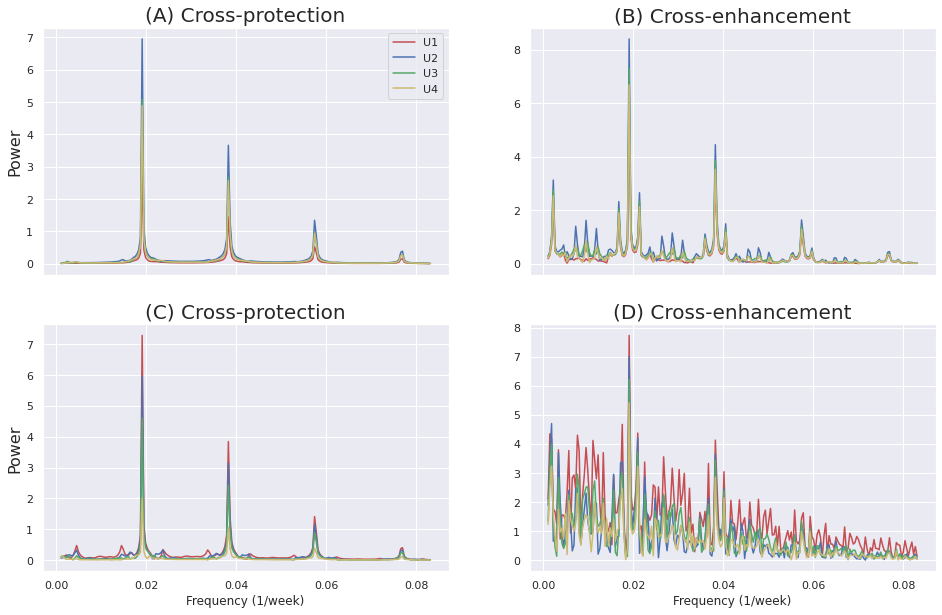

In [25]:
#plotting_fourier(cols_name,scenario,total_years):
#plotting_fourier_scenI('Us','scenI',50)
freqs_homo=[freqUs_mask_gen_cp,freqUs_mask_gen_ce,freqUs_mask_antigen_cp,freqUs_mask_antigen_ce]
powers_homo=[powerUs_mask_gen_cp,powerUs_mask_gen_ce,powerUs_mask_antigen_cp,powerUs_mask_antigen_ce]

plotting_fourier(freqs_homo,powers_homo,'Us','scenI',50)

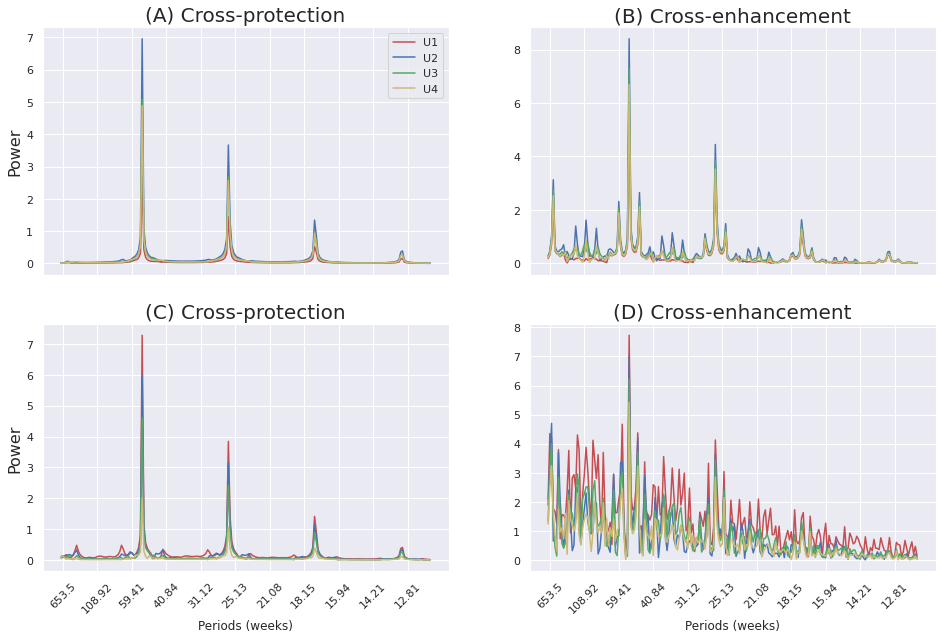

In [26]:
plotting_fourier_periods('Us','scenI',50)

## Heterogeneous parameters

In [27]:
min_freq=1/(52*20)   # 20 years
max_freq=1/(4*3)  #which means max period 3 months

freqUs_mask_gen_cp_he = [freq[(freq > min_freq) & (freq <= max_freq)] for freq in freqUs_gen_cp_he]
freqUs_mask_gen_ce_he = [freq[(freq > min_freq) & (freq <= max_freq)] for freq in freqUs_gen_ce_he]
freqUs_mask_antigen_cp_he = [freq[(freq > min_freq) & (freq <= max_freq)] for freq in freqUs_antigen_cp_he]
freqUs_mask_antigen_ce_he = [freq[(freq > min_freq) & (freq <= max_freq)] for freq in freqUs_antigen_ce_he]


powerUs_mask_gen_cp_he = [powerU[(freq > min_freq) & (freq <= max_freq)] for powerU,freq in zip(powerUs_gen_cp_he,freqUs_gen_cp_he)]
powerUs_mask_gen_ce_he = [powerU[(freq > min_freq) & (freq <= max_freq)] for powerU,freq in zip(powerUs_gen_ce_he,freqUs_gen_ce_he)]
powerUs_mask_antigen_cp_he = [powerU[(freq > min_freq) & (freq <= max_freq)] for powerU,freq in zip(powerUs_antigen_cp_he,freqUs_antigen_cp_he)]
powerUs_mask_antigen_ce_he = [powerU[(freq > min_freq) & (freq <= max_freq)] for powerU,freq in zip(powerUs_antigen_ce_he,freqUs_antigen_ce_he)]



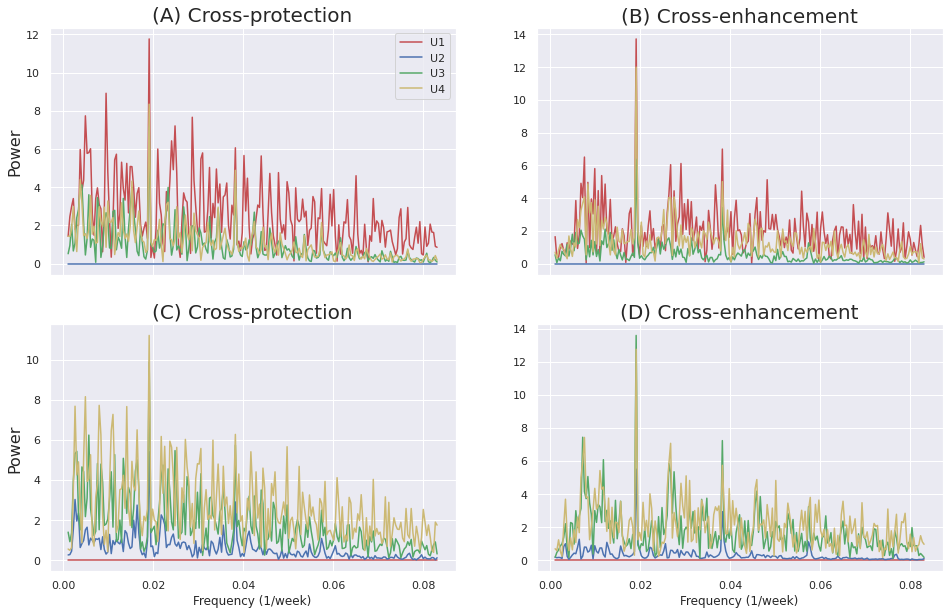

In [28]:
#plotting_fourier_scenII('Us','sce_henII',50)

freqs_hetero=[freqUs_mask_gen_cp_he,freqUs_mask_gen_ce_he,freqUs_mask_antigen_cp_he,freqUs_mask_antigen_ce_he]
powers_hetero=[powerUs_mask_gen_cp_he,powerUs_mask_gen_ce_he,powerUs_mask_antigen_cp_he,powerUs_mask_antigen_ce_he]

plotting_fourier(freqs_hetero,powers_hetero,'Us','scenII',50)


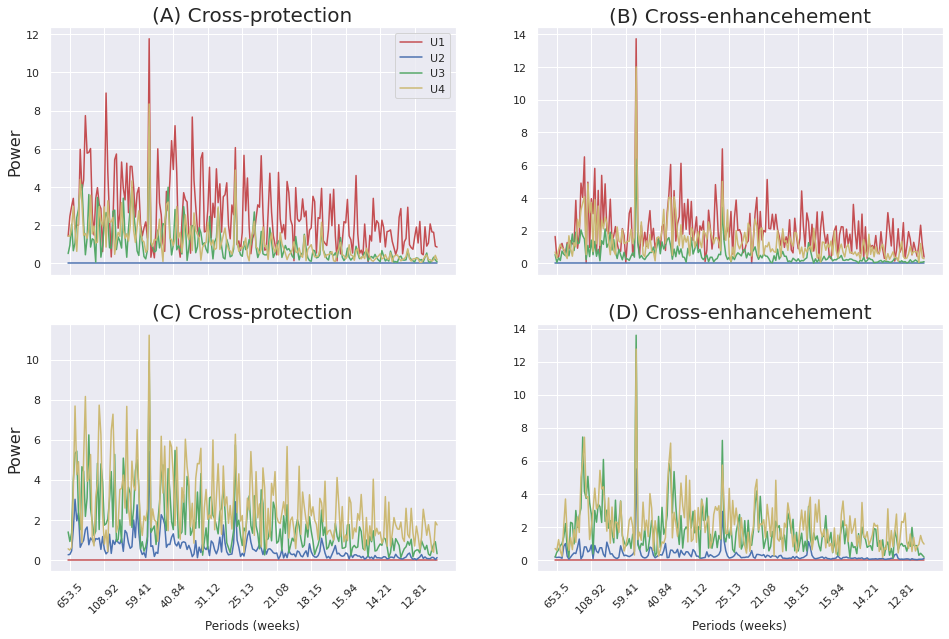

In [29]:
fig1,axes1=plt.subplots(2,2,figsize=(16,10),sharex=True)
#plt.suptitle('Fourier spectrum: Genetic vs Antigenic reinfection based \n (Homogeneous transmission)',fontsize=20)



axes1[0,0].set_title('(A) Cross-protection',fontsize=20)
axes1[0,1].set_title('(B) Cross-enhancehement',fontsize=20)
axes1[1,0].set_title('(C) Cross-protection',fontsize=20)
axes1[1,1].set_title('(D) Cross-enhancehement',fontsize=20)


for i in range(4):
    #ax2 = plt.subplot( 1, 2, 2 )
    #mask = (freq > min_freq) & (freq <= 0.4)
    #axes[i].plot(freqUs_mask[mask], power[mask])
    axes1[0,0].plot(freqUs_mask_gen_cp_he[i], powerUs_mask_gen_cp_he[i],color=colors[i],label=f'U{i+1}')
    axes1[0,1].plot(freqUs_mask_gen_ce_he[i], powerUs_mask_gen_ce_he[i],color=colors[i],label=f'U{i+1}')
    axes1[1,0].plot(freqUs_mask_antigen_cp_he[i], powerUs_mask_antigen_cp_he[i],color=colors[i],label=f'U{i+1}')
    axes1[1,1].plot(freqUs_mask_antigen_ce_he[i], powerUs_mask_antigen_ce_he[i],color=colors[i],label=f'U{i+1}')
    axes1[0,0].set_ylabel('Power',fontsize=16)
    axes1[1,0].set_ylabel('Power',fontsize=16)
    axes1[1,0].set_xlabel('Periods (weeks)')
    axes1[1,1].set_xlabel('Periods (weeks)')
    #axes1[i].set_title('Frequencies in (0, 0.25]')
    #axes[0].set_ylabel( 'Amplitud' )
    #axes[0].set_xlabel( 'Frequencias [1 / Mes]' )
    #axes[0].legend(loc='best')

#for i in range(2):
    #axes1[1,i].set_xticks(np.arange(freqUs_mask_gen_cp_he[0][0],freqUs_mask_gen_cp_he[0][-1],1))
    #axes1[1,i].set_xticklabels(np.arange(1/freqUs_mask_gen_cp_he[0][0],1/freqUs_mask_gen_cp_he[0][-1],1))

xaxis21_freqs=[f for f in freqUs_mask_antigen_cp_he[0][np.arange(1,len(freqUs_mask_antigen_cp_he[0]),20)]]
xaxis22_freqs=[f for f in freqUs_mask_antigen_ce_he[0][np.arange(1,len(freqUs_mask_antigen_ce_he[0]),20)]]

for i,axs_freqs in zip(range(2),[xaxis21_freqs,xaxis22_freqs]):
    axes1[1,i].set_xticks(axs_freqs) #from 1/10 years to 1/3months
    axes1[1,i].set_xticklabels([round(1/f,2) for f in axs_freqs],rotation=45)
    
axes1[0,0].legend(loc='best')


#plt.savefig(figs_path_fourier+'scenIIfourier_suw4v_mass_gen_vs_antigen_cp_he_ce_he_homo_N1M1_ivp.pdf',format='pdf')

# (III)  Fourier Genetic homo vs hetero 

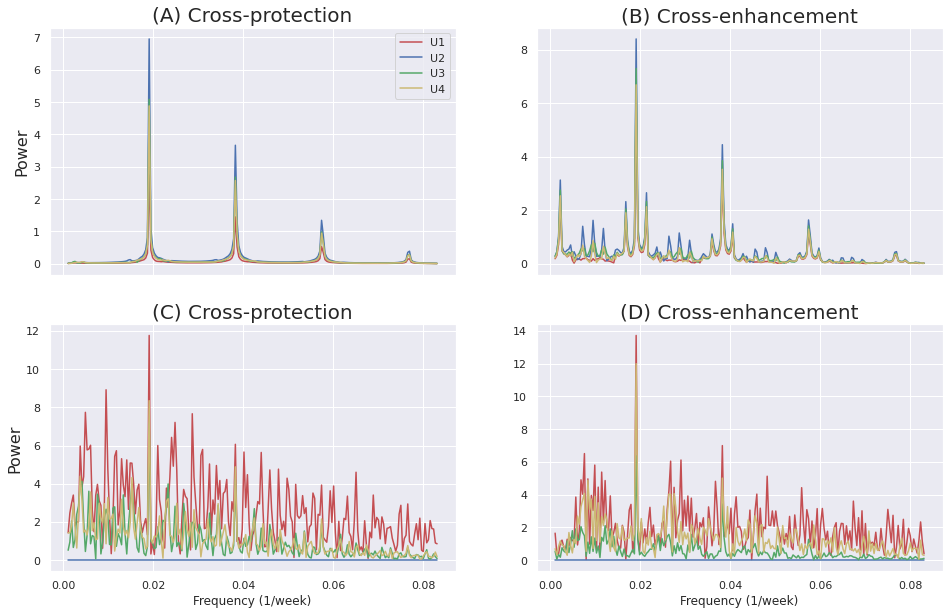

In [30]:
freqs_gen_homo_hetero=[freqUs_mask_gen_cp,freqUs_mask_gen_ce,freqUs_mask_gen_cp_he,freqUs_mask_gen_ce_he]
powers_gen_homo_hetero=[powerUs_mask_gen_cp,powerUs_mask_gen_ce,powerUs_mask_gen_cp_he,powerUs_mask_gen_ce_he]

plotting_fourier(freqs_gen_homo_hetero,powers_gen_homo_hetero,'Us','scenIII',50)


# (IV)  Fourier Antigenic homo vs hetero 

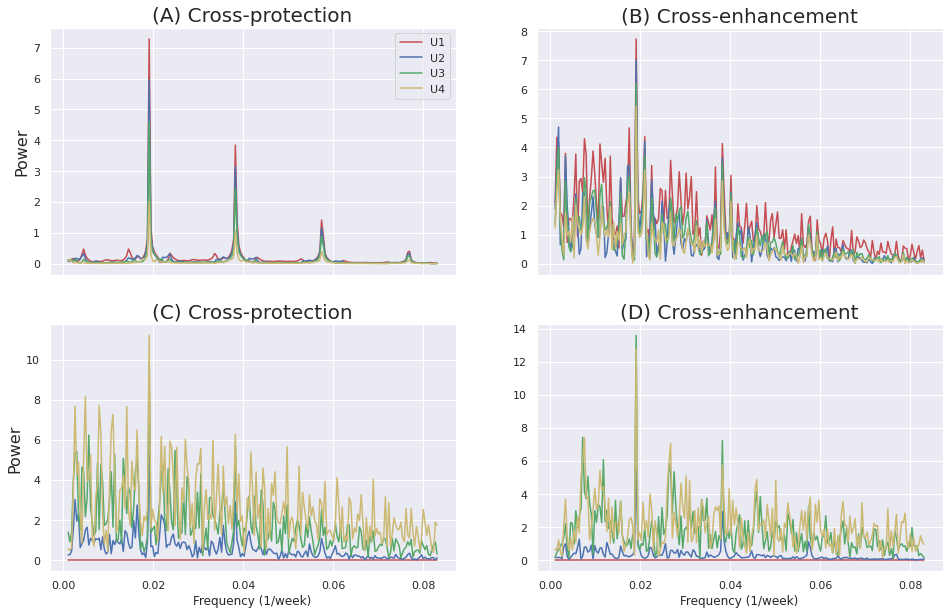

In [31]:
freqs_antigen_homo_hetero=[freqUs_mask_antigen_cp,freqUs_mask_antigen_ce,freqUs_mask_antigen_cp_he,freqUs_mask_antigen_ce_he]
powers_antigen_homo_hetero=[powerUs_mask_antigen_cp,powerUs_mask_antigen_ce,powerUs_mask_antigen_cp_he,powerUs_mask_antigen_ce_he]

plotting_fourier(freqs_antigen_homo_hetero,powers_antigen_homo_hetero,'Us','scenIV',50)
